## Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col= "date", parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df = df[(df['value']>= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to **"examples/Figure_1.png".** The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

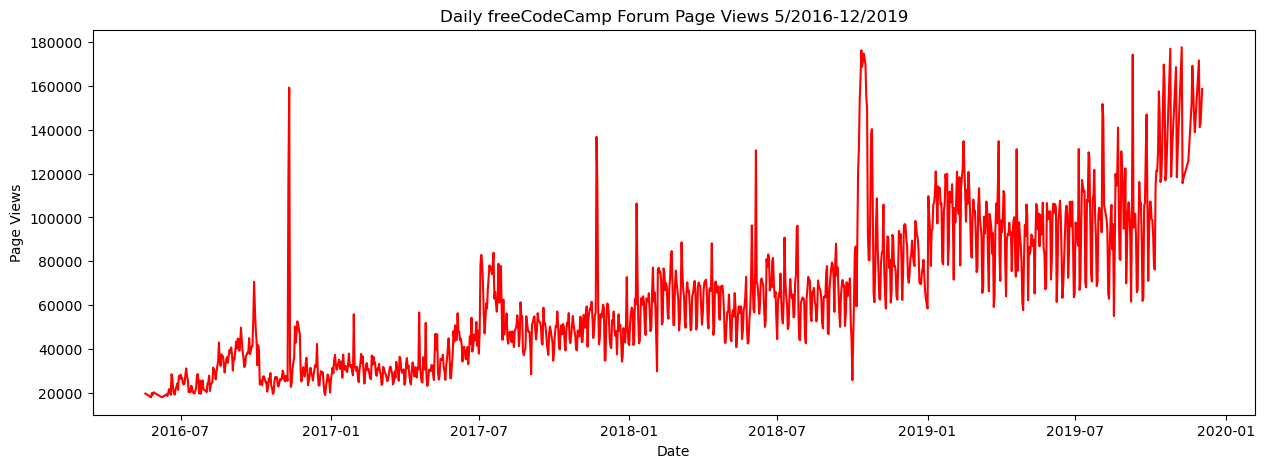

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['value'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [6]:
df['month'] = df.index.month
df['year'] = df.index.year
df_grouped = df.groupby(['year','month'])['value'].mean()
df_pivot =df_grouped.unstack()

df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


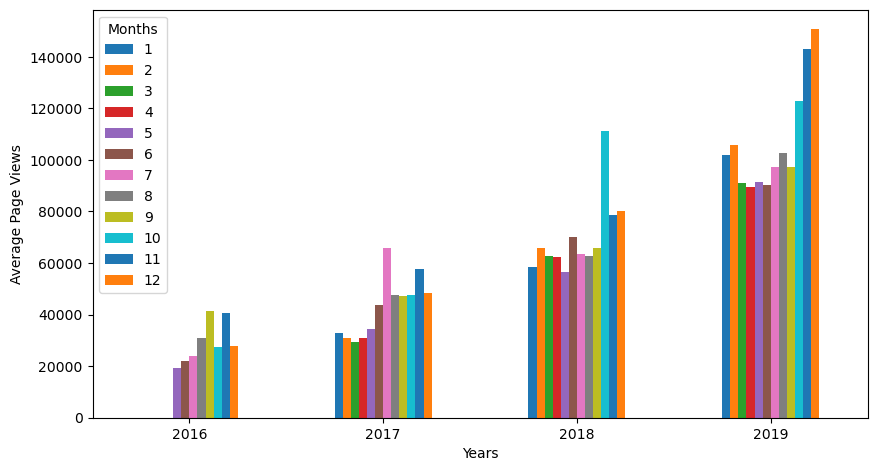

In [7]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind='bar', ax=ax)
    
# Agregar las etiquetas y títulos apropiados
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_xticklabels(df_pivot.index, rotation=0)
ax.legend(labels=df_pivot.columns, title='Months')
plt.subplots_adjust(bottom=0.2)

- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

Text(0, 0.5, 'Page Views')

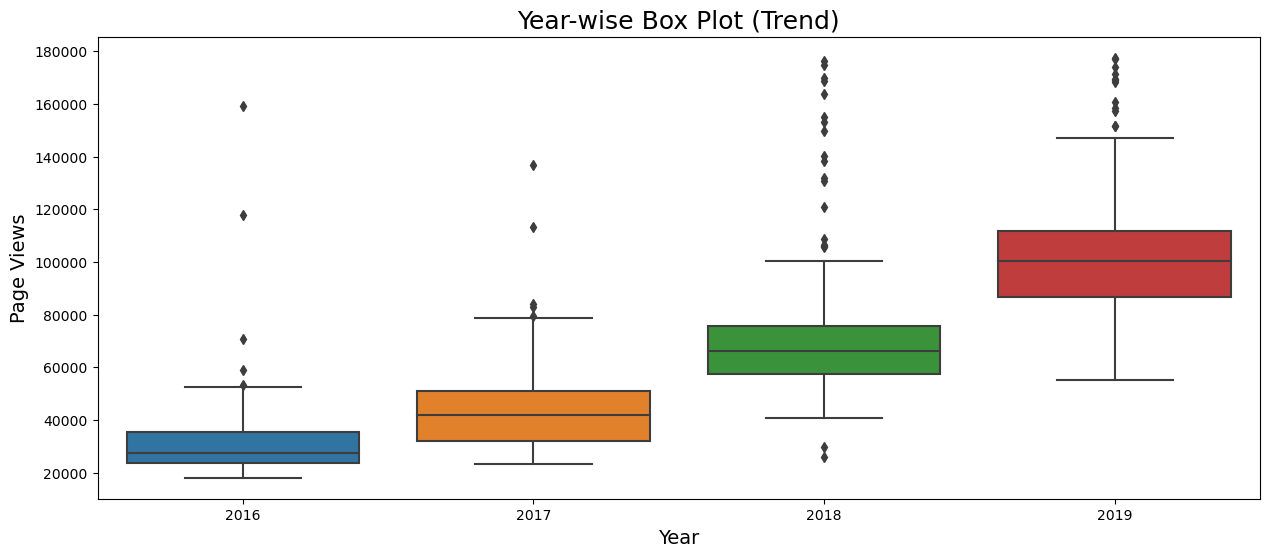

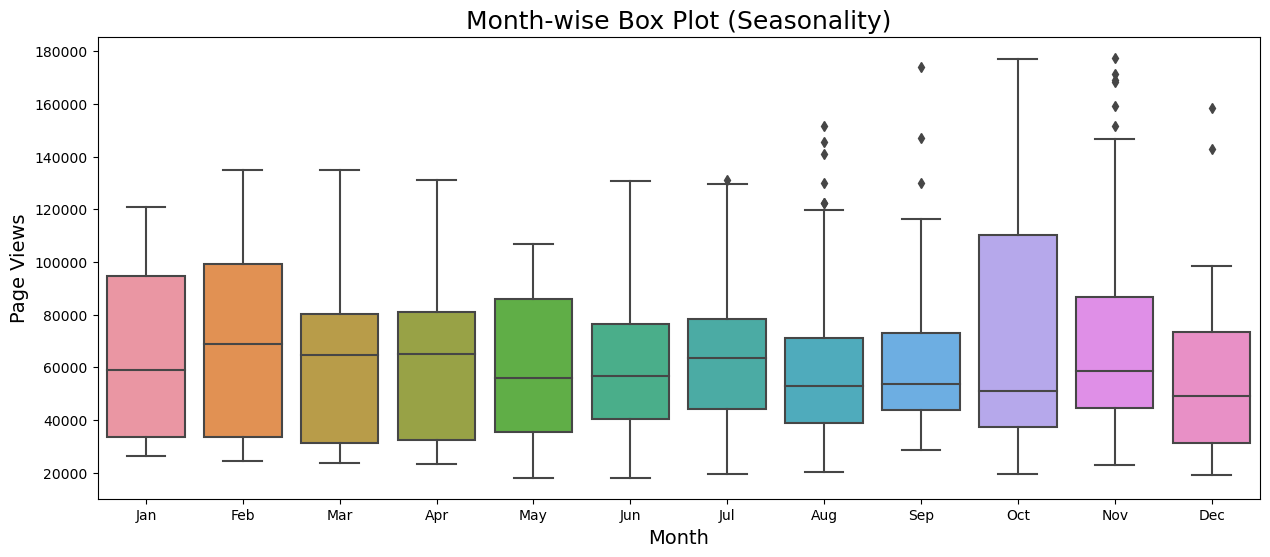

In [8]:
# Preparación de los datos
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box = df_box.sort_values(['year', 'date'])

# Gráfico de caja anual
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='year', y='value', data=df_box, ax=ax)
ax.set_title('Year-wise Box Plot (Trend)', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Page Views', fontsize=14)

# Gráfico de caja mensual
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='month', y='value', data=df_box, ax=ax, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('Month-wise Box Plot (Seasonality)', fontsize=18)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Page Views', fontsize=14)